<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics as st
from scipy.stats import pearsonr

Загрузить датасет по url:


In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [5]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

C:\Users\kostyaev\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kostyaev\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


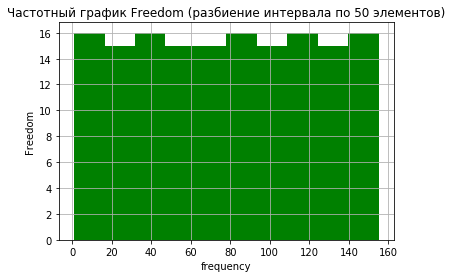

In [3]:
n, bins, patches = plt.hist(df['Freedom'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

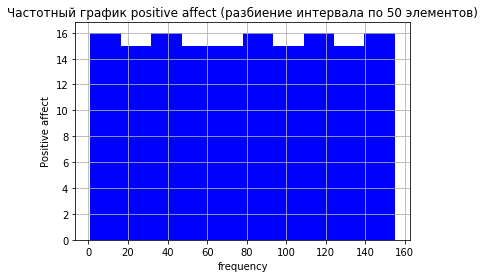

In [5]:
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='b')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график positive affect (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()


Распределение Freedom и Positive affect близко к равномерному.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [20]:
print('Медиана: ', st.median(df['Freedom']))
print('Математическое ожидание: ', st.mean(df['Freedom']))
#print('Мода : ', st.mode(df['Freedom']))
print('стандартное отклонение : ', st.stdev(df['Freedom']))

Медиана:  71.0
Математическое ожидание:  nan
стандартное отклонение :  nan


In [7]:
#создаем новый dataset без нулевых значений
df_new = df[(~df.Freedom.isnull()) & (~df['Positive affect'].isnull()) ]

In [8]:
print('Медиана: ', st.median(df_new['Freedom']))
print('Математическое ожидание: ', st.mean(df_new['Freedom']))
#print('Мода : ', st.mode(df_new['Freedom']))
print('стандартное отклонение : ', st.stdev(df_new['Freedom']))
print('дисперсия : ', st.pvariance(df_new['Freedom']))
print('минимум : ', min(df_new['Freedom']))
print('максмум : ', max(df_new['Freedom']))
print('размах : ', max(df_new['Freedom']) - min(df_new['Freedom']))


Медиана:  78.0
Математическое ожидание:  78.0
стандартное отклонение :  44.88875137492688
дисперсия :  2002.0
минимум :  1.0
максмум :  155.0
размах :  154.0


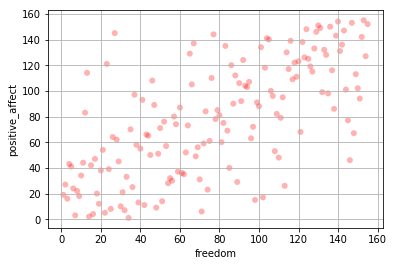

Явных выбросов не видно


In [9]:
#точечный график для визуальной проверки выбросов
freedom = df['Freedom']
positive_affect = df['Positive affect']
fig, ax = plt.subplots()
ax.scatter(freedom, positive_affect, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('freedom')
plt.ylabel('positive_affect')
plt.show()
print('Явных выбросов не видно')

Почему нельзя найти моду?

Моду для Freedom не возможно найти, т.к. при равномерном распределении частоты каждого возможного значения (примерно) одинаковы - отсутствует наиболее часто встречающееся значение.

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

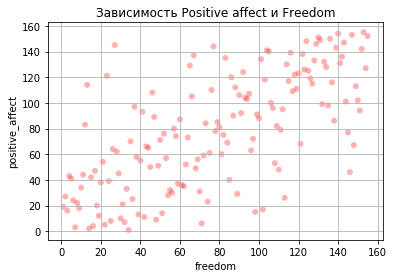

In [11]:
freedom = df_new['Freedom']
positive_affect = df_new['Positive affect']
fig, ax = plt.subplots()
ax.scatter(freedom, positive_affect, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('freedom')
plt.ylabel('positive_affect')
plt.title('Зависимость Positive affect и Freedom')
plt.show()

In [12]:
corr, p_value = pearsonr(freedom , positive_affect)
print(corr, p_value)

0.6817698430601656 1.595627948480997e-22


Знак коэффициента говорит о положительной прямой незначительной корреляции

In [14]:
freedom = df_new['Freedom']
print(st.mean(freedom))
freedom_1 = freedom - st.mean(freedom)
print(st.mean(freedom_1))

78.0
0.0


In [18]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print('min = ',freedom_2.min(), '; max = ', freedom_2.max())

min =  -1.0 ; max =  1.0


Text(0.5, 0.98, 'Нормализованные данные')

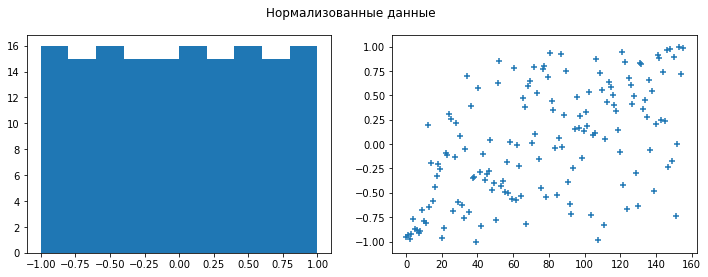

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(freedom_2)
ax[1].scatter(np.linspace(0, len(freedom_2), len(freedom_2)), freedom_2, marker='+')
fig.suptitle('Нормализованные данные')

Построить матрицу корреляций для всех колонок таблицы

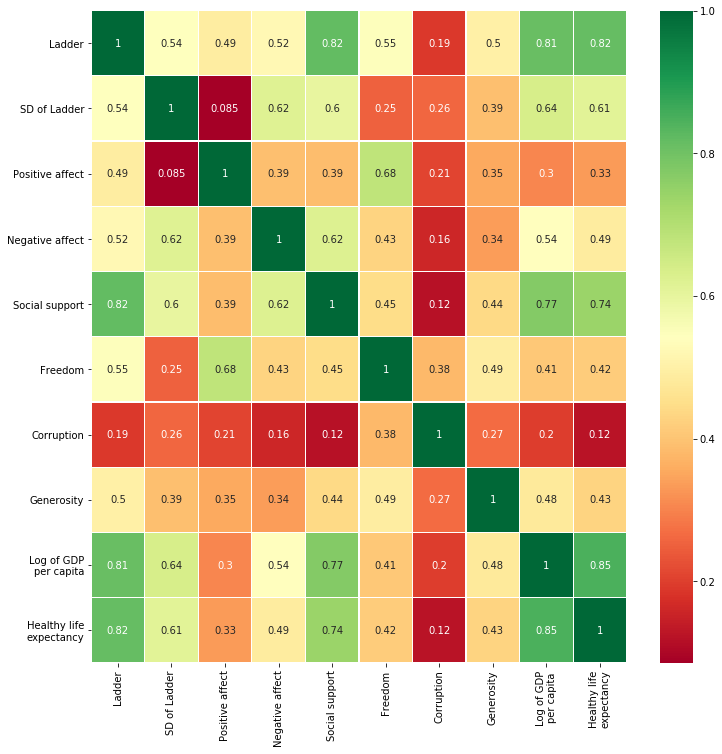

In [26]:
import seaborn as sns
sns.heatmap(df_new.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [28]:
import io
import requests
#url="http://yustiks.ru/avocado.csv"
df=pd.read_csv('avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

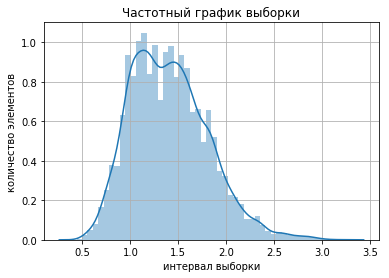

In [29]:
#plt.hist(df.AveragePrice)
sns.distplot(df.AveragePrice)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки')
plt.grid(True)
plt.show()

Распределение близко к нормальному.

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [15]:
type_4046 = df['4046']
type_4225 = df['4225']
type_4770 = df['4770']
avg_price = df['AveragePrice']

corr, p_value = pearsonr(type_4046, avg_price)
print('Pirson correlation coefficient for 4046: %.2f' % corr)

coef, p = sts.spearmanr(type_4046, avg_price)
print('Spearmans correlation coefficient for 4046: %.2f' % coef)

coef, p = sts.kendalltau(type_4046, avg_price)
print('Kendall correlation coefficient for 4046: %.2f' % coef)

print('')

corr, p_value = pearsonr(type_4225, avg_price)
print('Pirson correlation coefficient for 4225: %.2f' % corr)

coef, p = sts.spearmanr(type_4225, avg_price)
print('Spearmans correlation coefficient for 4225: %.2f' % coef)

coef, p = sts.kendalltau(type_4225, avg_price)
print('Kendall correlation coefficient for 4225: %.2f' % coef)

print('')

corr, p_value = pearsonr(type_4770, avg_price)
print('Pirson correlation coefficient for 4770: %.2f' % corr)

coef, p = sts.spearmanr(type_4770, avg_price)
print('Spearmans correlation coefficient for 4770: %.2f' % coef)

coef, p = sts.kendalltau(type_4770, avg_price)
print('Kendall correlation coefficient for 4770: %.2f' % coef)

Pirson correlation coefficient for 4046: -0.21
Spearmans correlation coefficient for 4046: -0.60
Kendall correlation coefficient for 4046: -0.42

Pirson correlation coefficient for 4225: -0.17
Spearmans correlation coefficient for 4225: -0.51
Kendall correlation coefficient for 4225: -0.34

Pirson correlation coefficient for 4770: -0.18
Spearmans correlation coefficient for 4770: -0.53
Kendall correlation coefficient for 4770: -0.37


In [ ]:
Есть небольшая отрицательная корреляция между объемами продаж и средним чеком по Спирмену, в остальных подходах отсутствует.